## Class structure


In [ ]:
!pip install numpy matplotlib

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:

## Imports

import random as rd
import matplotlib.pyplot as plt
import numpy as np

## Global variables

# Number of alternatives, denoted a, b, c, ..., n respectively
M_ALTERNATIVES = 2

# Amount of evidence there is for a as well as b
A_EVIDENCE = 3
B_EVIDENCE = 2

# Global constant to adjust probability of gaining pieces of evidence
P_COMPETENCE = 0.6

## Helper functions

def first_non_zero(arr):
    for element in arr:
        if element != 0:
            return element
    return None  # If all elements are zero, return None

## Defining Classes

class DeliberationSetting:
    def __init__(self, no_of_agents=5, a_evidence=3, b_evidence=2, p_competence=0.6):
        '''if no_of_agents % 2 == 0:
            raise ValueError("Behold, number of agents must be odd!")'''

        self.number_of_agents = no_of_agents
        self.A_EVIDENCE = a_evidence
        self.B_EVIDENCE = b_evidence
        self.P_COMPETENCE = p_competence

        self.crowd = Crowd(no_of_agents=self.number_of_agents, p_competence=self.P_COMPETENCE, a_evidence=self.A_EVIDENCE, b_evidence=self.B_EVIDENCE)

    def run_sim_keen(self):
        return self.crowd.deliberate_sim()


class Agent:

    def __init__(self, p_competence=0.6, a_evidence = 3, b_evidence = 2):

        self.P_COMPETENCE = p_competence
        self.A_EVIDENCE = a_evidence
        self.B_EVIDENCE = b_evidence

        self.es_A, self.es_B = self.sample_evidence() # Takes predefined evidence sets in, TBD adjust if necessary

        # Bool arrays to indicate whether a piece of evidence was learned from others or not
        self.es_A_acquired = [0] * self.A_EVIDENCE
        self.es_B_acquired = [0] * self.B_EVIDENCE

        self.update_top_keen() # Finds top alternative based on size of respective evidence sets

    def sample_evidence(self):
        evidence_for_a = [None] * self.A_EVIDENCE
        evidence_for_b = [None] * self.B_EVIDENCE

        # Fill evidence_for_a
        for i in range(len(evidence_for_a)):
            if rd.uniform(0, 1) <= self.P_COMPETENCE:
                evidence_for_a[i] = 1
            else:
                evidence_for_a[i] = 0

        # Fill evidence_for_b
        for i in range(len(evidence_for_b)):
            if rd.uniform(0, 1) <= self.P_COMPETENCE:
                evidence_for_b[i] = 1
            else:
                evidence_for_b[i] = 0

        return evidence_for_a, evidence_for_b

    # Determines current favorite
    def update_top_keen(self):
        # Count the number of ones in each list
        count_a = self.es_A.count(1)
        count_b = self.es_B.count(1)

        # Set self.top based on which list has more ones
        if count_a > count_b:
            self.top = 'A'
        elif count_b > count_a:
            self.top = 'B'
        else:
            # Handle the undecided state when counts are equal
            #raise ValueError("Agent undecided! What to do now?")

            self.top = 'X' # Stands for indifference or equal evidence

    ''' # Learning new pieces of evidence: Increases evidence set for either option A or B
    def learn_for(self, option, evidence_index):
        if option in ['A', 'B']:
            # Construct the attribute name based on the input
            es_name = f'es_{option}'
            es_name_acquired = f'{es_name}_acquired'

            # Retrieve the attribute (list) using getattr
            attr_list = getattr(self, es_name)
            acquired_list = getattr(self, es_name_acquired)

            # Ensure the evidence index is within valid range (1-based to 0-based)
            if 1 <= evidence_index <= len(attr_list):
                zero_index = evidence_index - 1
                attr_list[zero_index] = 1  # Set the specific index to 1
                acquired_list[zero_index] = 1 # Sets acquired index for the corresponding element to 1
            else:
                print(f"Error: evidence_index {evidence_index} is out of range.")

            # Update preferred option
            self.update_top()
        else:
            # handle invalid input for A
            print(f"Invalid option: {option}. Please choose 'A' or 'B'.")'''

class Crowd: # Some sort of dynamic process tracker / protocol initally, now a collective of agents

    def __init__(self, no_of_agents=5, p_competence=0.6, a_evidence=3, b_evidence=2):

        self.A_EVIDENCE = a_evidence
        self.B_EVIDENCE = b_evidence
        self.P_COMPETENCE = p_competence

        #if no_of_agents % 2 == 1:
        self.agents = [Agent(p_competence=self.P_COMPETENCE, a_evidence=self.A_EVIDENCE, b_evidence=self.B_EVIDENCE) for _ in range(no_of_agents)]
        #else:
           # raise ValueError("Number of agents must be odd.")

        self.public_evidence_A = [0] * len(self.agents[0].es_A)
        self.public_evidence_B = [0] * len(self.agents[0].es_B)
    # In case anything goes wrong and number needs to be readjusted

    def set_no_of_agents(self, number):
        self.no_of_agents = number

    def generate_profile(self, agents):
        profile = [None] * len(agents)

        # For each agent, call their top-ranked alternative and save it in a index-corresponding array
        for i in range(len(agents)):
            profile[i] = getattr(agents[i], 'top')

        return profile


    def get_winner(self, profile):
        profile = profile

        count_a = 0
        count_b = 0

        # Iterate over the array to count occurrences
        for char in profile:

            if char == 'A':
                count_a += 1

            elif char == 'B':
                count_b += 1

            # ! In case of indifference: Do nothing
            elif char == 'X':
                continue
            else:
                raise ValueError("Input array should only contain 'A' and 'B'.")

        # Compare counts to determine which letter is more frequent
        if count_a > count_b:
            return 'A'
        elif count_b > count_a:
            return 'B'
        else:
            print("Tie! Adjust number of agents using set_no_of_agents.")
            return 'X'

    # TBD: might be able to use this method for lazy dissenters as well and only ajust the update_top function of the agents
    def dissenters_keen(self, profile):
        profile = profile
        winner = self.get_winner(profile) # This may be dangerous to do? Maybe control this variable outside the method.

        # Initialize boolean array to indicate whether agent dissents or not
        dissent = [None] * len(profile)

        i = 0
        while i < len(profile):
            if profile[i] != winner: # This works for keen dissenters, since 'X' is not 'A', so this loop would activate for indifference
                # Handling the special case of an indifferent agent
                if profile[i] == 'X':
                    dissent[i] = 'B' if winner == 'A' else 'A'
                    # We dont need to handle case 'X' here, since then the bigger encasing if clause would not be true since X = X.
                else:
                    dissent[i] = profile[i]
            i += 1

        return dissent

    # Terminal plotter for evidence distribution
    def plot_agent_evidence(self, agents):
         # Marker for each agent
         i = 1
         for agent in agents:
            print(i)
            i += 1

            es_A_own = 0
            es_B_own = 0

            # Count private evidence, which is in the evidence set but not in the acquired set
            for j in range(len(agent.es_A)):
                if agent.es_A[j] == 1 and agent.es_A_acquired[j] == 0:
                    es_A_own += 1

            for k in range(len(agent.es_B)):
                if agent.es_B[k] == 1 and agent.es_B_acquired[k] == 0:
                    es_B_own += 1

            # Distinugish between private and acquired evidence
            print("Evidence A: " + "█" * es_A_own + "▒" * agent.es_A_acquired.count(1))
            print("Evidence B: " + "█" * es_B_own + "▒" * agent.es_B_acquired.count(1))

    def deliberate_sim(self):

        # Counts how many round of deliberation we have
        round = 0

        # Return reason for return statement
        ret_reason = None

        # Intialize important variables
        profile = self.generate_profile(self.agents)
        print(profile) # ___Printer___
        majority = self.get_winner(profile)
        minority = 'A' if majority == 'B' else 'B'
        revealed_in_round_A = [0] * self.A_EVIDENCE
        revealed_in_round_B = [0] * self.B_EVIDENCE

        # Initialize dissenters
        dissenters = self.dissenters_keen(profile)
        print('First dissenters:', dissenters)

        print('First majority vote:', majority) # ____Printer____
        print()

        while dissenters != [None] * len(self.agents):

            # Start of a new round
            round += 1

            # Revelation marker: If there exists a piece of evidence that was revealed during a round, it is true. Otherwise, deliberation terminates.
            new_evidence_revealed = False

            # For all dissenters, add their evidence for the minority alternative into the revealed evidence sets

            for i, is_dissenter_letter in enumerate(dissenters):
                if is_dissenter_letter != None:
                    # Get the set of evidence for the minority option from each dissenter
                    dissenter_evidence = f'es_{is_dissenter_letter}'
                    dissenter_evidence = getattr(self.agents[i], dissenter_evidence)
                    print(f'Agent {i} s dissenter_evidence for the minority {is_dissenter_letter}: ', dissenter_evidence) # ___Printer___

                    # Update the revealed_in_round sets to take on the the revealed evidence (only one if-clause will be activated)
                    if is_dissenter_letter == 'A':
                        for j in range(len(dissenter_evidence)):
                            if dissenter_evidence[j] == 1 and revealed_in_round_A[j] != 1:
                                revealed_in_round_A[j] = 1
                                new_evidence_revealed = True # Sets revealed marker to true

                                print(f'Revealing new evidence {j} for minority option {minority} from agent {i}') # ___Printer___
                    if is_dissenter_letter == 'B':
                        for k in range(len(dissenter_evidence)):
                            if dissenter_evidence[k] == 1 and revealed_in_round_B[k] != 1:
                                revealed_in_round_B[k] = 1
                                new_evidence_revealed = True # Sets revealed marker to true

                                print(f'Revealing new evidence {k} for minority option {minority} from agent {i}') # ___Printer___

            # If no new evidence was revealed, break the loop
            if not new_evidence_revealed:
                ret_reason = 'No more evidence to reveal from dissenters.'
                break

            # Add all the evidence to the public evidence sets for A and B cumulatively
            for i in range(len(revealed_in_round_A)):
                if revealed_in_round_A[i] == 1:
                    self.public_evidence_A[i] = 1

            for i in range(len(revealed_in_round_B)):
                if revealed_in_round_B[i] == 1:
                    self.public_evidence_B[i] = 1

            # Update the indivdual evidence sets of agents to take on the revealed evidence
            for agent in self.agents:

                # Update evidence for A with public evidence
                for i in range(len(self.public_evidence_A)):
                    if self.public_evidence_A[i] == 1 and agent.es_A[i] != 1:
                        agent.es_A[i] = 1
                        agent.es_A_acquired[i] = 1 # Mark as acquired information

                # Update evidence for B with public evidence
                for i in range(len(self.public_evidence_B)):
                    if self.public_evidence_B[i] == 1 and agent.es_B[i] != 1:
                        agent.es_B[i] = 1
                        agent.es_B_acquired[i] = 1 # Mark as acquired information

                agent.update_top_keen()  # Update each agents favorite option

            # Update profile, majority and minority
            self.profile = self.generate_profile(self.agents)
            print('New profile: ', self.profile) # ___Printer___

            majority = self.get_winner(self.profile)
            print('Newly assigned majority: ', majority) #___Printer___

            minority = 'A' if majority == 'B' else 'B'
            print('Newly assgined minority: ', minority) #___Printer___

            # Update dissenters
            dissenters = self.dissenters_keen(self.profile)
            print("Dissenters: ", dissenters) # ___Printer___

        print('Generating plot for deliberation end result...')
        self.plot_agent_evidence(self.agents)

        print(f'_______________WINNER {self.get_winner(self.generate_profile(self.agents))}.______________')
        print(f'Termination at round {round}: No more dissenters.' if ret_reason == None else f'Termination at round {round}: {ret_reason}')
        return self.get_winner(self.generate_profile(self.agents))


# Running the simulations

test_crowd = Crowd()

test_crowd.deliberate_sim()










['A', 'A', 'A', 'A', 'A']
First dissenters: [None, None, None, None, None]
First majority vote: A

Generating plot for deliberation end result...
1
Evidence A: █
Evidence B: 
2
Evidence A: ███
Evidence B: 
3
Evidence A: ███
Evidence B: █
4
Evidence A: ██
Evidence B: █
5
Evidence A: ███
Evidence B: ██
_______________WINNER A.______________
Termination at round 0: No more dissenters.


'A'

In [ ]:
i = 100
results = []

while i != 0:
    setting = DeliberationSetting(a_evidence=9, b_evidence = 7, p_competence=0.3)
    deliberation_result = setting.run_sim_keen()
    results.append(deliberation_result)
    i -= 1


print('--------')
print('FINAL Result: ',results)

['A', 'X', 'B', 'X', 'A']
First dissenters: [None, 'B', 'B', 'B', None]
First majority vote: A

Agent 1 s dissenter_evidence for the minority B:  [0, 0, 0, 0, 1, 0, 0]
Revealing new evidence 4 for minority option B from agent 1
Agent 2 s dissenter_evidence for the minority B:  [1, 0, 1, 1, 0, 0, 1]
Revealing new evidence 0 for minority option B from agent 2
Revealing new evidence 2 for minority option B from agent 2
Revealing new evidence 3 for minority option B from agent 2
Revealing new evidence 6 for minority option B from agent 2
Agent 3 s dissenter_evidence for the minority B:  [0, 0, 1, 0, 0, 1, 1]
Revealing new evidence 5 for minority option B from agent 3
New profile:  ['B', 'B', 'B', 'B', 'B']
Newly assigned majority:  B
Newly assgined minority:  A
Dissenters:  [None, None, None, None, None]
Generating plot for deliberation end result...
1
Evidence A: ███
Evidence B: ██▒▒▒▒▒
2
Evidence A: █
Evidence B: █▒▒▒▒▒
3
Evidence A: ███
Evidence B: ████▒▒
4
Evidence A: ███
Evidence B: █

## Standard Condorcet vs Deliberation simulation

Streaming output truncated to the last 5000 lines.
Evidence A: █████▒
Evidence B: ▒▒▒▒▒
10
Evidence A: ████▒▒
Evidence B: █████
11
Evidence A: ███▒▒▒
Evidence B: ████▒
12
Evidence A: ██▒▒▒▒
Evidence B: ██▒▒▒
13
Evidence A: ██▒▒▒▒
Evidence B: ███▒▒
14
Evidence A: ██▒▒▒▒
Evidence B: █████
15
Evidence A: █████▒
Evidence B: ███▒▒
16
Evidence A: █████▒
Evidence B: █▒▒▒▒
17
Evidence A: ███▒▒▒
Evidence B: ██▒▒▒
18
Evidence A: ████▒▒
Evidence B: ███▒▒
19
Evidence A: ██▒▒▒▒
Evidence B: ███▒▒
20
Evidence A: ████▒▒
Evidence B: ████▒
21
Evidence A: ████▒▒
Evidence B: ██▒▒▒
22
Evidence A: ██▒▒▒▒
Evidence B: ████▒
23
Evidence A: ████▒▒
Evidence B: ███▒▒
24
Evidence A: ████▒▒
Evidence B: ██▒▒▒
25
Evidence A: ████▒▒
Evidence B: ███▒▒
26
Evidence A: ████▒▒
Evidence B: ██▒▒▒
27
Evidence A: ████▒▒
Evidence B: ████▒
28
Evidence A: ████▒▒
Evidence B: █▒▒▒▒
29
Evidence A: █▒▒▒▒▒
Evidence B: ██▒▒▒
30
Evidence A: ███▒▒▒
Evidence B: █████
_______________WINNER A.______________
Termination at round 2: No more d

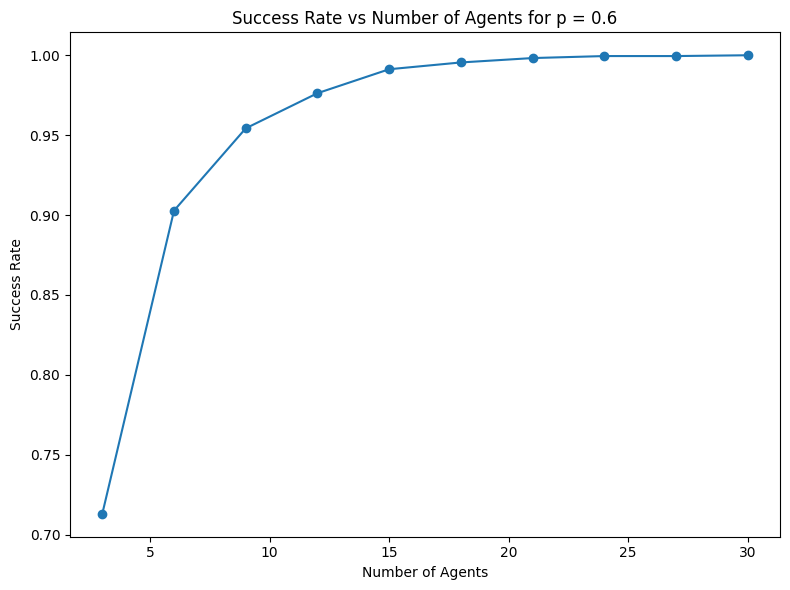

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iterations_per_agent = 4000
competence = 0.6
agent_counts = [3,6,9,12,15,18,21,24,27,30]  # Number of agents from 2 to 10

# Array with values showing success rate corresponding to number of agents
success_rates = []

for agents in agent_counts:
    single_round_successes = []
    ties = 0


    j = 0
    # Run specified number of times
    while j < iterations_per_agent:

        deliberation_setting = DeliberationSetting(p_competence = 0.6, a_evidence=6, b_evidence=5, no_of_agents=agents)
        result = deliberation_setting.run_sim_keen()

        if result is not None:
            single_round_successes.append(result)
            j += 1
        else:
            single_round_successes.append(result)
            j +=1

    # Calculate relative success
    success_rate = single_round_successes.count('A') / iterations_per_agent
    success_rates.append(success_rate)

# Generate the new plot with number of agents vs success rate
plt.figure(figsize=(8, 6))

plt.title("Success Rate vs Number of Agents for p = 0.6")
plt.xlabel("Number of Agents")
plt.ylabel("Success Rate")
plt.plot(agent_counts, success_rates, marker='o')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

# Sample data for success rates
agent_counts = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
p_competence = 0.6

def condorcet(n, p):
    sum_result = 0
    for i in range((n // 2) + 1, n + 1):
        binom_coeff = scipy.special.comb(n, i)
        term = binom_coeff * (p ** i) * ((1 - p) ** (n - i))
        sum_result += term
    return sum_result

# Compute Condorcet values for the given range of agent counts
condorcet_values = [condorcet(n, p_competence) for n in agent_counts]

# Diagnostic print to understand the behavior of condorcet values
for n, value in zip(agent_counts, condorcet_values):
    print(f'Agents: {n}, Condorcet Value: {value}')

# Plot success rates and Condorcet values
plt.figure(figsize=(10, 6))

plt.plot(agent_counts, success_rates, marker='o', label='Success Rates')
plt.plot(agent_counts, condorcet_values, marker='x', label='Condorcet Values')

plt.title("Success Rates and Condorcet Values vs Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Success Rate / Condorcet Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Agents: 3, Condorcet Value: 0.648
Agents: 6, Condorcet Value: 0.54432
Agents: 9, Condorcet Value: 0.7334323199999999
Agents: 12, Condorcet Value: 0.6652085575679999
Agents: 15, Condorcet Value: 0.786896817389568
Agents: 18, Condorcet Value: 0.7368411690211737
Agents: 21, Condorcet Value: 0.8256221336382271
Agents: 24, Condorcet Value: 0.7869782010394586
Agents: 27, Condorcet Value: 0.85534823563728
Agents: 30, Condorcet Value: 0.8246309464931707


NameError: name 'success_rates' is not defined

<Figure size 1000x600 with 0 Axes>

## Diversity 1

###Diversity score generation and distributions

In [ ]:
'''This is the function, we normalized over the total number of evidence peices as well'''
# Average number of differing elements between each pair of agents and each evidence piece
def diversityscore(crowd):
    score = 0
    agents = crowd.agents
    num_agents = len(agents)
    comparisons_agents = num_agents * (num_agents - 1) // 2
    total_evidence_pieces = len(agents[0].es_A) + len(agents[0].es_B)

    for i in range(num_agents):
        agent1 = agents[i]
        for j in range(i + 1, num_agents):
            agent2 = agents[j]
            for k in range(len(agent1.es_A)):
                if agent1.es_A[k] != agent2.es_A[k]:
                    score += 1
            for k in range(len(agent1.es_B)):
                if agent1.es_B[k] != agent2.es_B[k]:
                    score += 1

    normalized_score = score / (comparisons_agents*total_evidence_pieces)

    return normalized_score

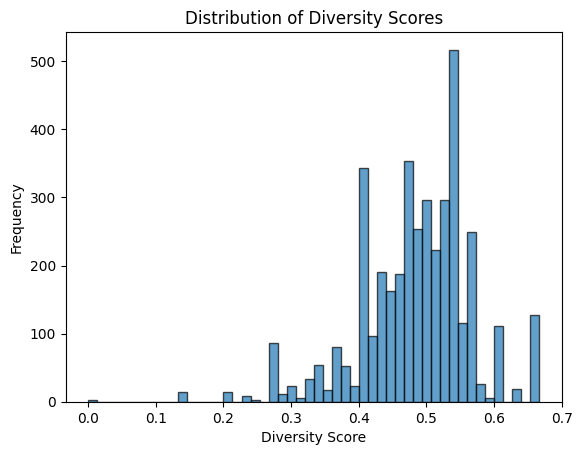

In [ ]:
# Test for random agent numbers
diversity_scores = []
for _ in range(4000):
    crowd = Crowd(no_of_agents= np.random.randint(3, 10))
    score = diversityscore(crowd)
    diversity_scores.append(score)

plt.hist(diversity_scores, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Diversity Scores')
plt.xlabel('Diversity Score')
plt.ylabel('Frequency')
plt.show()

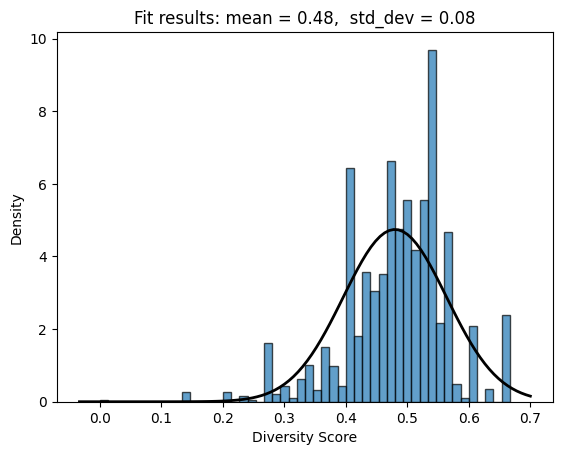

In [ ]:
import scipy.stats as stats
# Plot the histogram of diversity scores
plt.hist(diversity_scores, bins=50, edgecolor='black', alpha=0.7, density=True)

# Fit a normal distribution to the data
mean, std_dev = np.mean(diversity_scores), np.std(diversity_scores)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std_dev = %.2f" % (mean, std_dev)
plt.title(title)

plt.xlabel('Diversity Score')
plt.ylabel('Density')
plt.show()

In [ ]:
# Comparing different distributions of diversity scores for different agent numbers

def compare_agent_distributions(agent_values, num_samples=4000):
    plt.figure(figsize=(14, 10))

    for i, agents in enumerate(agent_values):
        diversity_scores = []
        for _ in range(num_samples):
            crowd = Crowd(no_of_agents=agents)
            score = diversityscore(crowd)
            diversity_scores.append(score)

        mean, std_dev = np.mean(diversity_scores), np.std(diversity_scores)
        xmin, xmax = 0, 1
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mean, std_dev)

        plt.subplot(2, 2, i + 1)
        plt.hist(diversity_scores, bins=50, edgecolor='black', alpha=0.7, density=True)
        plt.plot(x, p, 'k', linewidth=2)
        title = f"Agents: {agents}, Mean: {mean:.2f}, Std Dev: {std_dev:.2f}"
        plt.title(title)
        plt.xlabel('Diversity Score')
        plt.ylabel('Density')

    plt.tight_layout()
    plt.show()



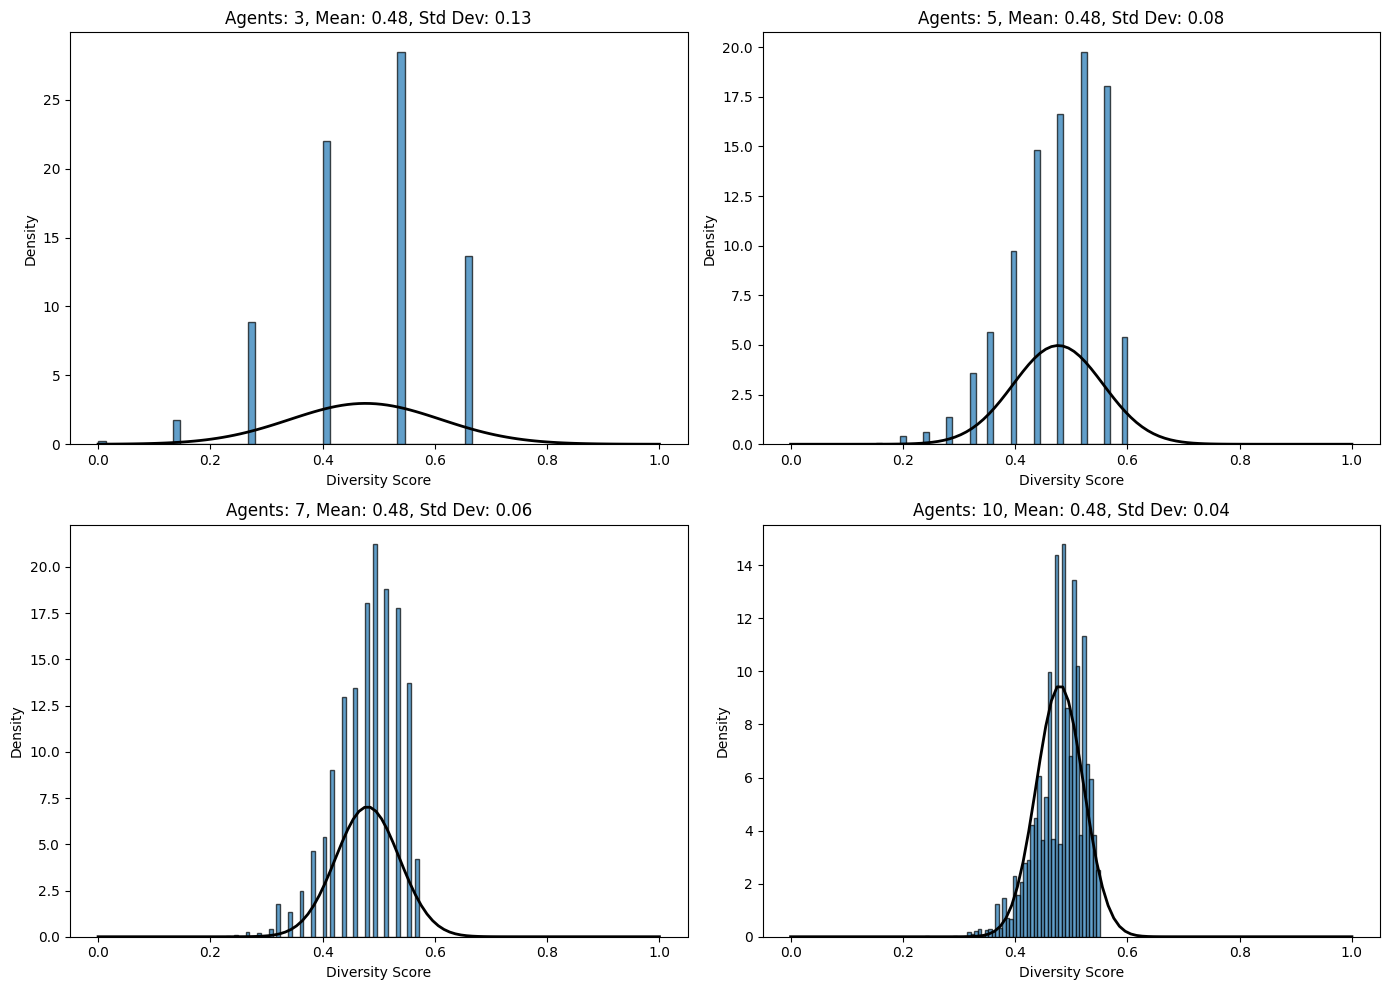

In [ ]:
agent_values = [3, 5, 7, 10]
compare_agent_distributions(agent_values)

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(diversity_scores)

p_value

3.5433451975051717e-34

### Plotting the performance wiht one set of crowds

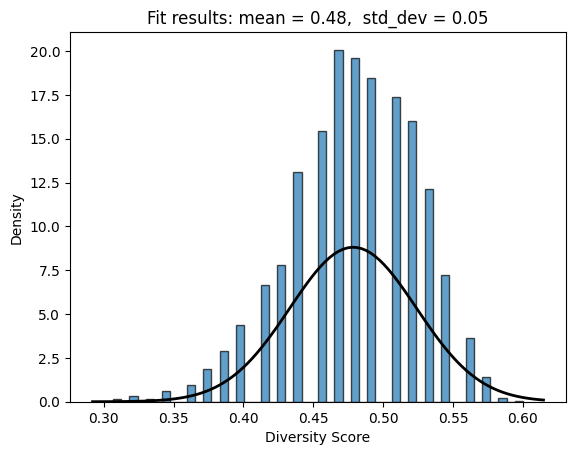

In [ ]:
'''Here we will do the same thing again but for our chosen parameters for the diversity test. We will choose buckets according
the quantiles of this distribution!'''

diversity_scores_uniform = []
for _ in range(4000):
    crowd = Crowd(no_of_agents = 5, a_evidence = 8, b_evidence = 7)
    score = diversityscore(crowd)
    diversity_scores_uniform.append(score)

import scipy.stats as stats
# Plot the histogram of diversity scores
plt.hist(diversity_scores_uniform, bins=50, edgecolor='black', alpha=0.7, density=True)

# Fit a normal distribution to the data
mean, std_dev = np.mean(diversity_scores_uniform), np.std(diversity_scores_uniform)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std_dev = %.2f" % (mean, std_dev)
plt.title(title)

plt.xlabel('Diversity Score')
plt.ylabel('Density')
plt.show()

In [ ]:
quantiles = np.percentile(diversity_scores_uniform, [25, 50, 75])

print(quantiles)

[0.45333333 0.48       0.50666667]


In [ ]:
# Define the quartile thresholds
quartile_1 = quantiles[0]
quartile_2 = quantiles[1]
quartile_3 = quantiles[2]

# Initialize the buckets
bucket_1 = []
bucket_2 = []
bucket_3 = []
bucket_4 = []

# Generate crowds and place them in buckets
while len(bucket_1) < 4000 or len(bucket_2) < 4000 or len(bucket_3) < 4000 or len(bucket_4) < 4000:
    crowd = Crowd(no_of_agents=5, a_evidence=8, b_evidence=7)
    score = diversityscore(crowd)

    if score <= quartile_1 and len(bucket_1) < 4000:
        bucket_1.append(crowd)
    elif quartile_1 < score <= quartile_2 and len(bucket_2) < 4000:
        bucket_2.append(crowd)
    elif quartile_2 < score <= quartile_3 and len(bucket_3) < 4000:
        bucket_3.append(crowd)
    elif score > quartile_3 and len(bucket_4) < 4000:
        bucket_4.append(crowd)

# Verify the number of crowds in each bucket
len(bucket_1), len(bucket_2), len(bucket_3), len(bucket_4)

(4000, 4000, 4000, 4000)

In [ ]:
# Create comparison data
comparison_crowds = [Crowd(no_of_agents=5, a_evidence=8, b_evidence=7, p_competence=0.6) for _ in range(4000)]
comparison_results = []

for crowd in comparison_crowds:
    result = crowd.deliberate_sim()
    comparison_results.append(result)

comparison_success_rate = comparison_results.count('A') / len(comparison_results)
print("Comparison Success Rate:", comparison_success_rate)

Streaming output truncated to the last 5000 lines.
Termination at round 3: No more evidence to reveal from dissenters.
['A', 'B', 'A', 'B', 'A']
First dissenters: [None, 'B', None, 'B', None]
First majority vote: A

Agent 1 s dissenter_evidence for the minority B:  [1, 1, 1, 1, 1, 0, 1]
Revealing new evidence 0 for minority option B from agent 1
Revealing new evidence 1 for minority option B from agent 1
Revealing new evidence 2 for minority option B from agent 1
Revealing new evidence 3 for minority option B from agent 1
Revealing new evidence 4 for minority option B from agent 1
Revealing new evidence 6 for minority option B from agent 1
Agent 3 s dissenter_evidence for the minority B:  [0, 1, 1, 1, 0, 1, 1]
Revealing new evidence 5 for minority option B from agent 3
New profile:  ['B', 'B', 'B', 'B', 'X']
Newly assigned majority:  B
Newly assgined minority:  A
Dissenters:  [None, None, None, None, 'A']
Agent 4 s dissenter_evidence for the minority A:  [0, 1, 1, 1, 1, 1, 1, 1]
Reveal

Streaming output truncated to the last 5000 lines.
4
Evidence A: ████▒▒▒
Evidence B: █▒▒▒▒▒▒
5
Evidence A: ████▒▒▒
Evidence B: █████▒▒
_______________WINNER A.______________
Termination at round 4: No more evidence to reveal from dissenters.
['A', 'B', 'B', 'A', 'X']
Tie! Adjust number of agents using set_no_of_agents.
Tie! Adjust number of agents using set_no_of_agents.
First dissenters: ['A', 'B', 'B', 'A', None]
First majority vote: X

Agent 0 s dissenter_evidence for the minority A:  [1, 1, 1, 0, 0, 1, 1, 0]
Revealing new evidence 0 for minority option B from agent 0
Revealing new evidence 1 for minority option B from agent 0
Revealing new evidence 2 for minority option B from agent 0
Revealing new evidence 5 for minority option B from agent 0
Revealing new evidence 6 for minority option B from agent 0
Agent 1 s dissenter_evidence for the minority B:  [1, 1, 1, 0, 1, 1, 1]
Revealing new evidence 0 for minority option B from agent 1
Revealing new evidence 1 for minority option B fro

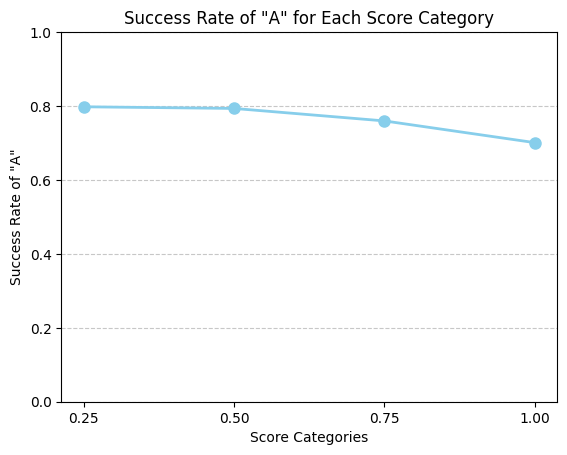

In [ ]:
import matplotlib.pyplot as plt

# Assuming crowds and deliberation_results are defined as in your previous code
crowds = [
    bucket_1,
    bucket_2,
    bucket_3,
    bucket_4
]

deliberation_results = [[] for _ in range(len(crowds))]

# Assuming 'scorecat' is a list of crowds, and you want to iterate over each crowd
for i, scorecat in enumerate(crowds):
    for crowd in scorecat:
        deliberation_results[i].append(crowd.deliberate_sim())

# Calculate success rates for each score category 'A'
success_rates = []

for results in deliberation_results:
    count_A = results.count('A')
    success_rate = count_A / len(results)
    success_rates.append(success_rate)

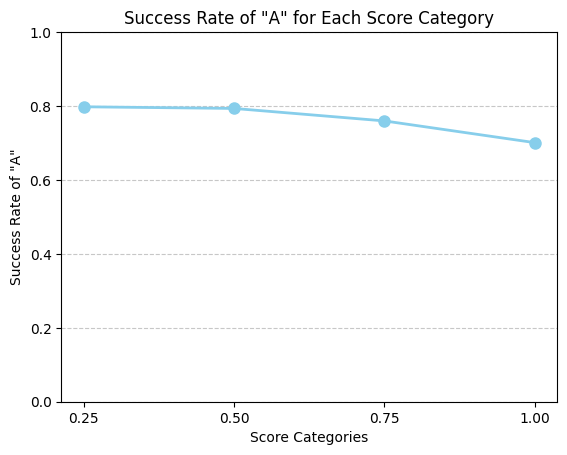

In [ ]:
score_categories = [0.25, 0.5, 0.75, 1]

# Plotting the success rates as a line graph
plt.plot(score_categories, success_rates, marker='o', linestyle='-',
         color='skyblue', linewidth=2, markersize=8)

plt.xlabel('Score Categories')
plt.ylabel('Success Rate of "A"')
plt.title('Success Rate of "A" for Each Score Category')
plt.xticks(score_categories)  # Set x-axis ticks to be score categories
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


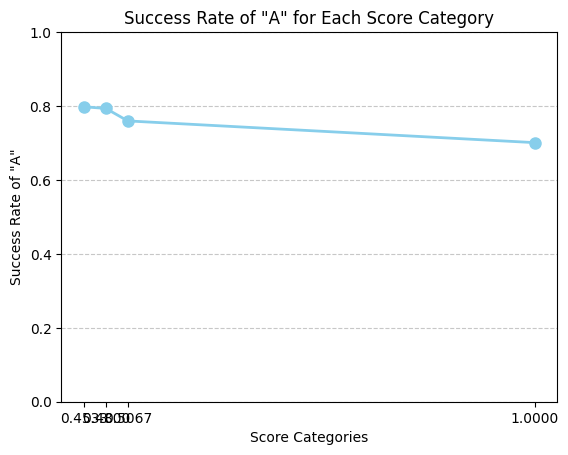

In [ ]:
# Plotting the success rates as a line graph
score_categories_nonquantile = [quartile_1,quartile_2, quartile_3, 1]
plt.plot(score_categories_nonquantile, success_rates, marker='o', linestyle='-',
         color='skyblue', linewidth=2, markersize=8)

plt.xlabel('Score Categories')
plt.ylabel('Success Rate of "A"')
plt.title('Success Rate of "A" for Each Score Category')
plt.xticks(score_categories_nonquantile)  # Set x-axis ticks to be score categories
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Deprecated

In [ ]:
import math
score_below_20 = []
score_21 = []
score_22 = []
score_23 = []
score_24 = []
score_25 = []
score_26 = []
score_27 = []
score_28 = []
score_above_28 = []

# Generate crowds and categorize based on diversity score ranges
for _ in range(100):
    crowd = Crowd(no_of_agents=5)
    score = diversityscore(crowd)
    print(score)
    floored_score = float("{:.1f}".format(score)) # Floor the score

    # Categorize based on floored score
    if floored_score == 2.0:
        score_below_20.append(crowd)
    elif floored_score == 2.1:
        score_21.append(crowd)
    elif floored_score == 2.2:
        score_22.append(crowd)
    elif floored_score == 2.3:
        score_23.append(crowd)
    elif floored_score == 2.4:
        score_24.append(crowd)
    elif floored_score == 2.5:
        score_25.append(crowd)
    elif floored_score == 2.6:
        score_26.append(crowd)
    elif floored_score == 2.7:
        score_27.append(crowd)
    elif floored_score == 2.8:
        score_28.append(crowd)
    elif floored_score == 2.8:
        score_above_28.append(crowd)

# Example of printing the number of crowds in each range
print(f"Number of crowds with diversity score below 20: {len(score_below_20)}")
print(f"Number of crowds with diversity score of 2.1: {len(score_21)}")
print(f"Number of crowds with diversity score of 2.2: {len(score_22)}")
print(f"Number of crowds with diversity score of 2.3: {len(score_23)}")
print(f"Number of crowds with diversity score of 2.4: {len(score_24)}")
print(f"Number of crowds with diversity score of 2.5: {len(score_25)}")
print(f"Number of crowds with diversity score of 2.6: {len(score_26)}")
print(f"Number of crowds with diversity score of 2.7: {len(score_27)}")
print(f"Number of crowds with diversity score of 2.8: {len(score_28)}")
print(f"Number of crowds with diversity score above 2.8: {len(score_above_28)}")

NameError: name 'Crowd' is not defined

In [ ]:
def categorize_score(score, crowd):
    if score < 2.0:
        score_below_20.append(crowd)
    elif score == 2.1:
        score_21.append(crowd)
    elif score == 2.2:
        score_22.append(crowd)
    elif score == 2.3:
        score_23.append(crowd)
    elif score == 2.4:
        score_24.append(crowd)
    elif score == 2.5:
        score_25.append(crowd)
    elif score == 2.6:
        score_26.append(crowd)
    elif score == 2.7:
        score_27.append(crowd)
    elif score == 2.8:
        score_28.append(crowd)
    else:
        score_above_28.append(crowd)


while len(score_below_20) < 4000 or len(score_21) < 4000 or len(score_22) < 4000 or len(score_23) < 4000 or len(score_24) < 4000 or len(score_25) < 4000 or len(score_26) < 4000 or len(score_27) < 4000 or len(score_28) < 4000:
    crowd = Crowd(no_of_agents=7)
    score = diversityscore(crowd)
    floored_score = float("{:.1f}".format(score)) # Floor the score
    print(floored_score)
    categorize_score(floored_score, crowd)


Streaming output truncated to the last 5000 lines.
2.4
2.8
2.6
2.9
1.9
2.5
2.7
2.8
2.2
2.6
2.3
2.6
2.3
2.1
2.9
2.1
2.7
2.1
2.7
2.2
2.0
2.2
2.8
2.4
2.4
2.8
2.0
2.6
2.6
2.7
2.6
2.7
2.2
2.9
2.6
2.5
2.7
2.7
2.8
2.4
1.6
2.4
2.3
2.3
2.5
2.0
2.6
2.5
2.3
2.7
2.5
2.9
2.4
2.3
1.9
2.5
2.2
2.2
2.8
2.5
2.6
2.3
2.8
2.8
2.6
2.8
2.1
2.4
2.9
2.4
2.4
2.4
2.3
2.5
2.4
2.1
2.6
2.4
2.1
2.6
2.5
2.4
2.8
2.5
2.9
1.9
2.8
2.4
2.5
2.2
1.6
2.5
2.8
1.8
2.3
2.7
2.7
2.7
1.8
1.8
2.1
2.3
2.4
2.5
2.6
2.7
2.6
2.3
2.8
2.5
2.9
2.2
2.2
2.6
2.6
2.7
2.8
2.5
2.1
2.0
2.5
2.3
2.2
1.9
2.7
2.6
2.2
2.5
2.1
2.2
2.2
2.7
2.4
1.8
2.5
2.4
2.6
2.5
2.1
2.3
2.5
2.6
2.6
2.6
1.9
2.5
1.9
2.3
2.4
2.6
2.5
2.2
2.5
2.0
2.4
2.2
2.2
2.6
2.5
2.7
2.3
2.7
2.1
2.7
2.7
2.5
2.0
2.5
2.1
2.2
2.8
2.4
2.7
2.1
2.6
2.4
2.5
2.4
2.2
2.2
2.2
2.4
2.6
2.7
2.8
2.4
1.9
2.3
2.5
2.3
2.2
2.8
2.8
2.1
2.6
2.3
2.1
2.6
1.9
2.5
2.1
2.7
2.7
1.8
1.6
2.6
2.2
2.6
2.5
2.8
2.6
2.5
2.5
2.3
2.6
2.4
2.5
2.5
2.4
2.8
2.5
2.5
2.8
2.7
2.3
2.5
2.5
2.4
2.6
1.3
2.1
2.4
2.8
2.8
1.7
2.4
2.7
2

In [ ]:
# Truncate all buckets to exactly 3000 crowds
score_below_20 = score_below_20[:3000]
score_21 = score_21[:4000]
score_22 = score_22[:4000]
score_23 = score_23[:4000]
score_24 = score_24[:4000]
score_25 = score_25[:4000]
score_26 = score_26[:4000]
score_27 = score_27[:4000]
score_28 = score_28[:4000]
score_above_28 = score_above_28[:4000]

In [ ]:
print(len(score_27))

4000


## Diversity 2

### *Definition*

In [ ]:
def difference_num_evidence(crowd):
    agents = crowd.agents
    num_agents = len(agents)
    comparisons_agents = num_agents * (num_agents - 1) // 2

    ascore = 0
    bscore = 0

    for i in range(num_agents):
        agent1 = agents[i]
        for j in range(i + 1, num_agents):
            agent2 = agents[j]

            if agent1.es_A.count(1) != agent2.es_A.count(1):
                ascore += 1
            if agent1.es_B.count(1) != agent2.es_B.count(1):
                bscore += 1

        # Normalize the scores by the number of agent comparisons
        #ascore /= comparisons_agents
        #bscore /= comparisons_agents

    return ascore + bscore

### Plotting distributions

Streaming output truncated to the last 5000 lines.
17
13
21
22
22
20
22
17
20
20
23
20
24
22
14
20
16
19
19
16
23
13
22
17
18
18
17
22
23
22
21
19
22
17
17
19
16
22
20
22
22
20
20
17
14
16
19
23
16
20
20
23
18
23
22
22
16
20
20
22
21
20
13
16
24
19
23
21
24
18
22
12
14
22
22
18
23
20
17
22
16
24
16
22
16
16
23
22
19
20
17
20
22
19
16
20
18
20
22
17
19
22
12
22
21
22
18
20
20
23
20
13
20
14
20
17
20
23
16
22
17
18
16
13
20
18
20
19
20
19
8
18
21
22
17
19
16
16
10
16
18
22
21
9
21
20
23
19
22
22
22
22
18
22
19
20
20
20
22
22
19
20
16
20
16
14
17
20
24
22
16
21
16
22
17
20
18
13
23
16
24
23
21
23
14
22
22
23
21
22
22
17
25
22
16
20
9
24
16
19
19
21
17
23
10
19
20
20
13
22
21
16
16
17
9
21
23
17
18
19
20
22
20
20
16
21
21
22
23
24
18
24
20
23
20
20
19
22
24
17
17
20
21
22
23
17
22
22
11
17
22
20
20
22
14
20
22
20
16
17
10
20
23
19
20
25
19
20
14
14
23
19
20
22
14
19
22
19
17
20
19
24
20
12
19
24
22
18
16
20
24
22
18
19
16
20
20
23
22
19
20
17
22
24
24
16
23
22
16
18
19
16
22
17
21
21
20
22

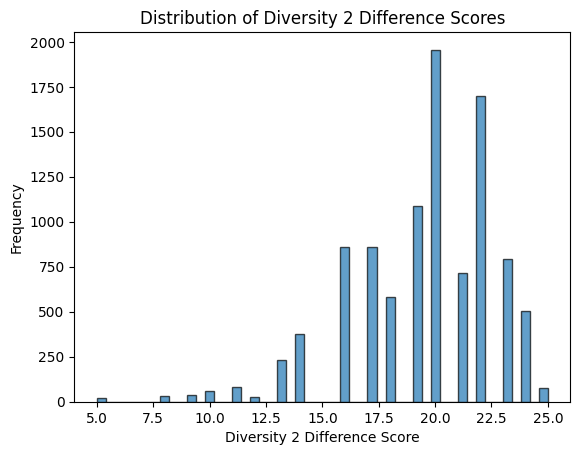

In [ ]:
# Test of distribution
diversity_scores = []
for _ in range(10000):
    crowd = Crowd(no_of_agents= 6)
    score = difference_num_evidence(crowd)
    print(score)
    diversity_scores.append(score)

plt.hist(diversity_scores, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Diversity 2 Difference Scores')
plt.xlabel('Diversity 2 Difference Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# The maximum of the difference score for every agent is if every agent has a different number of evidence pieces: (n-1)(n)/2 * 2
# The minimum number is if theyre all the same: 0
# So let's normalize this. TBD

def normalized_diversity_score(diversity_score):
  return diversity_score


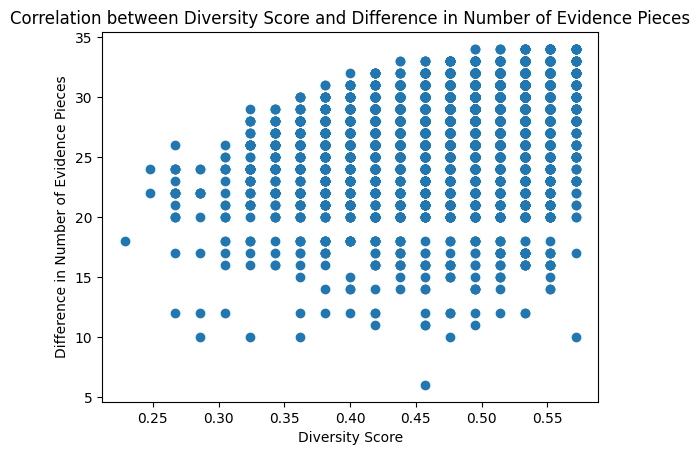

In [ ]:
# prompt: Create a graphic for randomly generated crowds (number of agents = 7) that shows the correlation between diversityscore() and difference_num_evidence()

import matplotlib.pyplot as plt

# Generate random crowds
crowds = [Crowd(no_of_agents=7) for _ in range(6000)]

# Calculate diversity scores
diversity_scores1 = [diversityscore(crowd) for crowd in crowds]

# Calculate difference in number of evidence pieces
difference_scores2 = [difference_num_evidence(crowd) for crowd in crowds]

# Create a scatter plot
plt.scatter(diversity_scores1, difference_scores2)

# Set labels and title
plt.xlabel("Diversity Score")
plt.ylabel("Difference in Number of Evidence Pieces")
plt.title("Correlation between Diversity Score and Difference in Number of Evidence Pieces")

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

diversity_scores1 = []
diversity_scores2 = []
for _ in range(5000):
    crowd = Crowd(no_of_agents=5)
    score2 = difference_num_evidence(crowd)
    score1 = diversityscore(crowd)
    diversity_scores2.append(score1)
    diversity_scores2.append(score2)

# Compute the 2D histogram
hist, xedges, yedges = np.histogram2d(diversity_scores1, diversity_scores2, bins=50)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', edgecolor='black')

ax.set_title('3D Histogram of Diversity Scores')
ax.set_xlabel('Diversity Score 1')
ax.set_ylabel('Diversity Score 2')
ax.set_zlabel('Frequency')

plt.show()

ValueError: x and y must have the same length.

### Simulations for agent difference

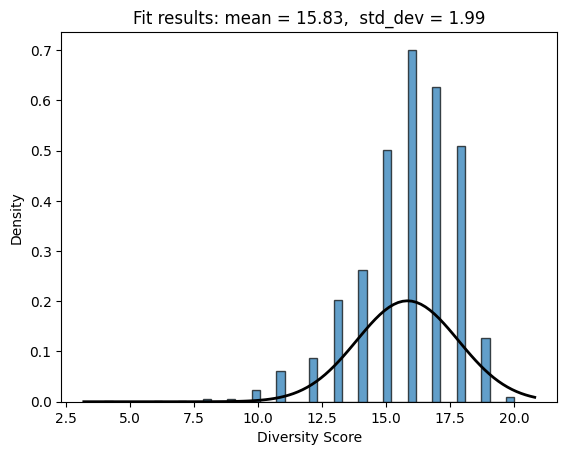

In [ ]:
'''Here we will do the same thing again but for our chosen parameters for the diversity test. We will choose buckets according
the quantiles of this distribution!'''

diversity_scores_uniform = []
for _ in range(4000):
    crowd = Crowd(no_of_agents = 5, a_evidence = 8, b_evidence = 7)
    score = difference_num_evidence(crowd)
    diversity_scores_uniform.append(score)

import scipy.stats as stats
# Plot the histogram of diversity scores
plt.hist(diversity_scores_uniform, bins=50, edgecolor='black', alpha=0.7, density=True)

# Fit a normal distribution to the data
mean, std_dev = np.mean(diversity_scores_uniform), np.std(diversity_scores_uniform)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std_dev = %.2f" % (mean, std_dev)
plt.title(title)

plt.xlabel('Diversity Score')
plt.ylabel('Density')
plt.show()

In [ ]:
quantiles = np.percentile(diversity_scores_uniform, [25, 50, 75])

print(quantiles)

[15. 16. 17.]


In [ ]:
# Define the quartile thresholds
quartile_1 = quantiles[0]
quartile_2 = quantiles[1]
quartile_3 = quantiles[2]

# Initialize the buckets
bucket_1 = []
bucket_2 = []
bucket_3 = []
bucket_4 = []

# Generate crowds and place them in buckets
while len(bucket_1) < 4000 or len(bucket_2) < 4000 or len(bucket_3) < 4000 or len(bucket_4) < 4000:
    crowd = Crowd(no_of_agents=5, a_evidence=8, b_evidence=7)
    score = difference_num_evidence(crowd)

    if score <= quartile_1 and len(bucket_1) < 4000:
        bucket_1.append(crowd)
    elif quartile_1 < score <= quartile_2 and len(bucket_2) < 4000:
        bucket_2.append(crowd)
    elif quartile_2 < score <= quartile_3 and len(bucket_3) < 4000:
        bucket_3.append(crowd)
    elif score > quartile_3 and len(bucket_4) < 4000:
        bucket_4.append(crowd)

# Verify the number of crowds in each bucket
len(bucket_1), len(bucket_2), len(bucket_3), len(bucket_4)


import matplotlib.pyplot as plt

# Assuming crowds and deliberation_results are defined as in your previous code
crowds = [
    bucket_1,
    bucket_2,
    bucket_3,
    bucket_4
]

deliberation_results = [[] for _ in range(len(crowds))]

# Assuming 'scorecat' is a list of crowds, and you want to iterate over each crowd
for i, scorecat in enumerate(crowds):
    for crowd in scorecat:
        deliberation_results[i].append(crowd.deliberate_sim())

# Calculate success rates for each score category 'A'
success_rates_d2 = []

for results in deliberation_results:
    count_A = results.count('A')
    success_rate = count_A / len(results)
    success_rates_d2.append(success_rate)

Streaming output truncated to the last 5000 lines.
Evidence A: ███████▒
Evidence B: ████▒▒▒
2
Evidence A: ███▒▒▒▒▒
Evidence B: ████▒▒▒
3
Evidence A: ████████
Evidence B: █████▒▒
4
Evidence A: ██████▒▒
Evidence B: ██▒▒▒▒▒
5
Evidence A: █████▒▒▒
Evidence B: ███▒▒▒▒
_______________WINNER A.______________
Termination at round 3: No more dissenters.
['A', 'A', 'B', 'A', 'X']
First dissenters: [None, None, 'B', None, 'B']
First majority vote: A

Agent 2 s dissenter_evidence for the minority B:  [1, 1, 1, 1, 1, 1, 0]
Revealing new evidence 0 for minority option B from agent 2
Revealing new evidence 1 for minority option B from agent 2
Revealing new evidence 2 for minority option B from agent 2
Revealing new evidence 3 for minority option B from agent 2
Revealing new evidence 4 for minority option B from agent 2
Revealing new evidence 5 for minority option B from agent 2
Agent 4 s dissenter_evidence for the minority B:  [1, 1, 1, 1, 1, 1, 1]
Revealing new evidence 6 for minority option B from 

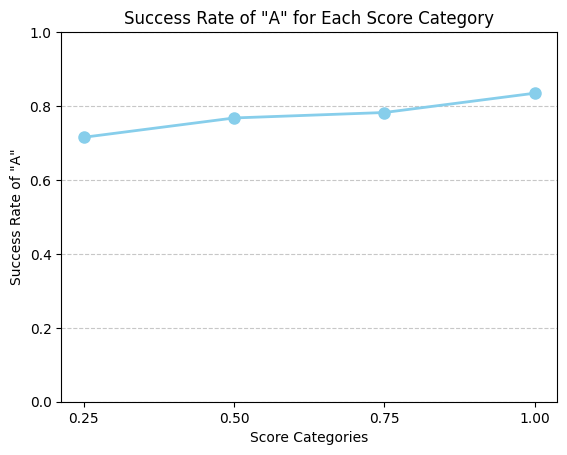

In [ ]:
score_categories = [0.25, 0.5, 0.75, 1]

# Plotting the success rates as a line graph
plt.plot(score_categories, success_rates_d2, marker='o', linestyle='-',
         color='skyblue', linewidth=2, markersize=8)

plt.xlabel('Score Categories')
plt.ylabel('Success Rate of "A"')
plt.title('Success Rate of "A" for Each Score Category')
plt.xticks(score_categories)  # Set x-axis ticks to be score categories
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
# prompt: Write a function that plots the score categories and success rates for difference_in_evidence buckets each for different values of numbers of agents. In other words, do the exact same as above, but have the graph show multiple lines for different agent numbers.  But do not plot the quartile numbers 0.25, ... , 0.75, 1, but plot them on a normal scale to show where the quartiles are for each agent

def plot_success_rates_by_agent_number(agent_values):
  for agents in agent_values:
    diversity_scores_uniform = []
    for _ in range(4000):
      crowd = Crowd(no_of_agents=agents, a_evidence=8, b_evidence=7)
      score = difference_num_evidence(crowd)
      diversity_scores_uniform.append(score)

    quantiles = np.percentile(diversity_scores_uniform, [25, 50, 75])

    # Initialize the buckets
    bucket_1 = []
    bucket_2 = []
    bucket_3 = []
    bucket_4 = []

    # Generate crowds and place them in buckets
    while len(bucket_1) < 4000 or len(bucket_2) < 4000 or len(bucket_3) < 4000 or len(bucket_4) < 4000:
      crowd = Crowd(no_of_agents=agents, a_evidence=8, b_evidence=7)
      score = difference_num_evidence(crowd)

      if score <= quantiles[0] and len(bucket_1) < 4000:
        bucket_1.append(crowd)
      elif quantiles[0] < score <= quantiles[1] and len(bucket_2) < 4000:
        bucket_2.append(crowd)
      elif quantiles[1] < score <= quantiles[2] and len(bucket_3) < 4000:
        bucket_3.append(crowd)
      elif score > quantiles[2] and len(bucket_4) < 4000:
        bucket_4.append(crowd)

    # Assuming crowds and deliberation_results are defined as in your previous code
    crowds = [
      bucket_1,
      bucket_2,
      bucket_3,
      bucket_4
    ]

    deliberation_results = [[] for _ in range(len(crowds))]

    # Assuming 'scorecat' is a list of crowds, and you want to iterate over each crowd
    for i, scorecat in enumerate(crowds):
      for crowd in scorecat:
        deliberation_results[i].append(crowd.deliberate_sim())

    # Calculate success rates for each score category 'A'
    success_rates = []

    for results in deliberation_results:
      count_A = results.count('A')
      success_rate = count_A / len(results)
      success_rates.append(success_rate)

    # Plot the success rates as a line graph
    plt.plot(quantiles, success_rates, marker='o', linestyle='-',
             color='skyblue', linewidth=2, markersize=8, label=f"{agents} agents")

  plt.xlabel('Score Categories')
  plt.ylabel('Success Rate of "A"')
  plt.title('Success Rate of "A" for Each Score Category by Agent Number')
  plt.xticks(quantiles)  # Set x-axis ticks to be score categories
  plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.legend()
  plt.show()

agent_values = [3, 5, 7, 10]
plot_success_rates_by_agent_number(agent_values)


KeyboardInterrupt: 